In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#to display info about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Preprocessing the dataset

In [8]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

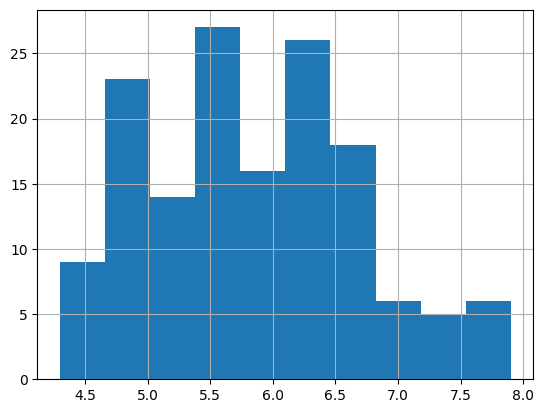

In [9]:
df['sepal_length'].hist()

<Axes: >

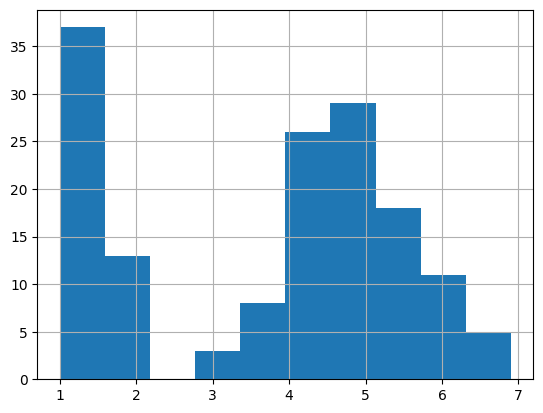

In [10]:
df['petal_length'].hist()

In [11]:
#scatterplot
colors=['red','orange','blue']
species=['setosa','versicolor','virginica']


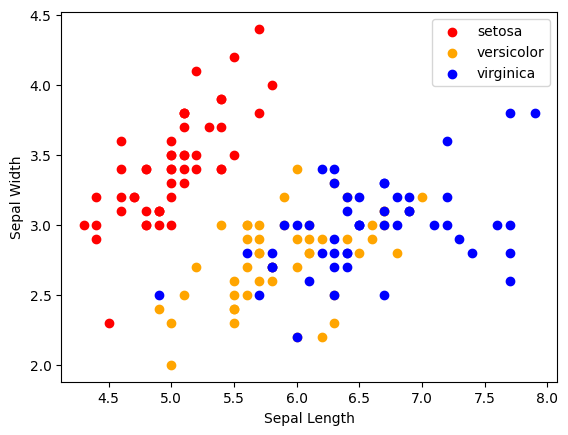

In [16]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()

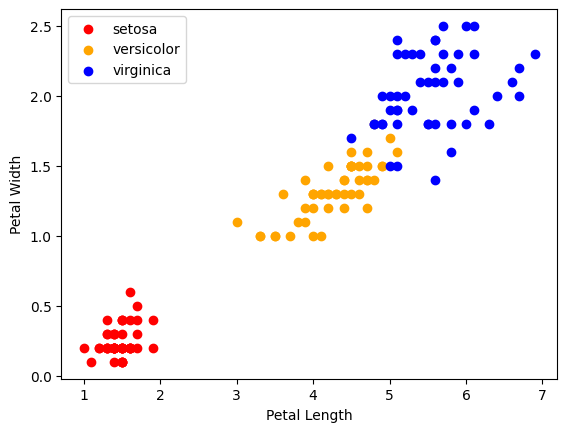

In [17]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()

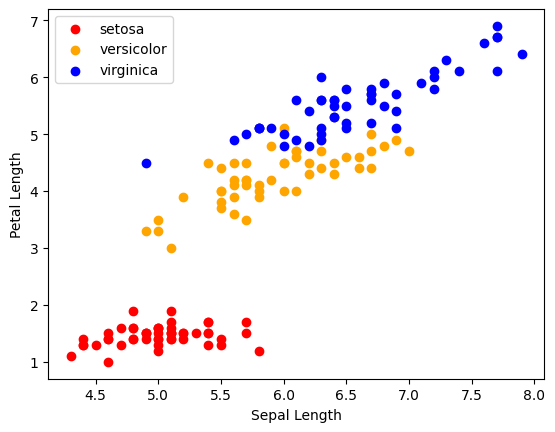

In [18]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Petal Length')
  plt.legend()

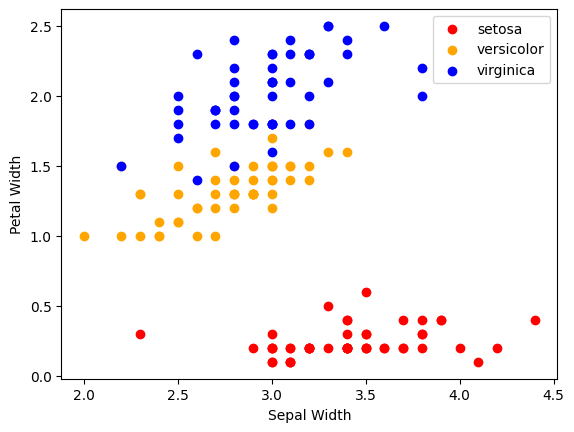

In [19]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel('Sepal Width')
  plt.ylabel('Petal Width')
  plt.legend()

Coorelation Matrix
A correlation matrix is a table showing correlation coeeficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1 . If two variables have high correlation ,we an neglect one variable from those two.



In [23]:
df.corr()

ValueError: could not convert string to float: 'setosa'

In [22]:

corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

ValueError: could not convert string to float: 'setosa'

<Axes: >

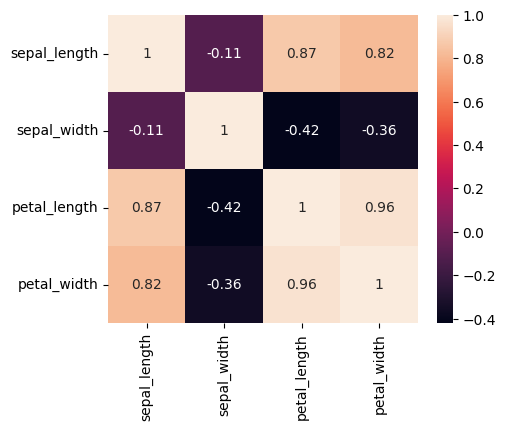

In [24]:
# Calculate correlations for numerical columns only
corr = df.select_dtypes(include=['number']).corr()

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax)


Label encoder
in ml , we usually deal with datasets which contains multiple lables in one or more than one columns. These labels can be in the form of words or numbers.Label Encoding refers to converting labels into numeric form so as to convert it into the machine-readable form.
```
# This is formatted as code
```



In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
df['species']=le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [28]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [29]:
#Logistic Regression
from sklearn import linear_model
model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [34]:
#knn-k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [36]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333
